<br><br><br><br><br>

# Getting ROOT data into Numpy

<br><br><br><br><br>

<br><br><br><br><br><br>

<span style="font-size: 24px; margin-left: 230px"><b>Method 1: PyROOT</b></span>

<br><br><br><br><br><br>

In [1]:
import ROOT

file = ROOT.TFile("data/HZZ.root")
tree = file.Get("events")

for i, event in enumerate(tree):
    print(event.MET_px, event.MET_py)
    if i > 10:
        break

Welcome to JupyROOT 6.17/01
5.912771224975586 2.5636332035064697
24.76520347595215 -16.349109649658203
-25.78508758544922 16.237131118774414
8.619895935058594 -22.78654670715332
5.393138885498047 -1.3100523948669434
-3.7594752311706543 -19.417020797729492
23.962148666381836 -9.049156188964844
-57.533348083496094 -20.48767852783203
42.416194915771484 -94.35086059570312
-1.9144694805145264 -23.96303367614746
19.710058212280273 4.645508766174316
-35.538055419921875 -14.753822326660156


In [2]:
# That worked, but it would be too slow for large datasets.
# PyROOT does A LOT of processing each time it is invoked, so we don't want that in a loop over events.

# However, there's an alternative that goes straight to Numpy:
tree.AsMatrix(["MET_px", "MET_py"])

array([[  5.91277122,   2.5636332 ],
       [ 24.76520348, -16.34910965],
       [-25.78508759,  16.23713112],
       ...,
       [ 18.10164642,  50.29071808],
       [ 79.87519073, -52.35145187],
       [ 19.71374893,  -3.59541821]])

In [3]:
# If you need the branch names, you can get them with return_labels=True

data, labels = tree.AsMatrix(["MET_px", "MET_py"], return_labels=True)
print(f"labels = {labels}\n")

import pandas
pandas.DataFrame(data, columns=labels)

labels = ['MET_px', 'MET_py']



,MET_px,MET_py
0,5.912771,2.563633
1,24.765203,-16.349110
2,-25.785088,16.237131
3,8.619896,-22.786547
4,5.393139,-1.310052
5,-3.759475,-19.417021
6,23.962149,-9.049156
7,-57.533348,-20.487679
8,42.416195,-94.350861
9,-1.914469,-23.963034


In [4]:
# If your data have more than one value per event, PyROOT can handle that...

for i, event in enumerate(tree):
    print(len(event.Muon_Px), "muons:", [x for x in event.Muon_Px])
    if i > 10:
        break

2 muons: [-52.89945602416992, 37.7377815246582]
1 muons: [-0.8164593577384949]
2 muons: [48.987831115722656, 0.8275666832923889]
2 muons: [22.08833122253418, 76.6919174194336]
2 muons: [45.171321868896484, 39.75095748901367]
2 muons: [9.228110313415527, -5.793715000152588]
2 muons: [12.538717269897461, 29.541839599609375]
1 muons: [34.883758544921875]
2 muons: [-53.16697311401367, 11.491869926452637]
2 muons: [-67.01485443115234, -18.118755340576172]
2 muons: [15.983028411865234, 34.68440628051758]
2 muons: [-70.51190948486328, -38.028743743896484]


In [5]:
# ...but tree.AsMatrix cannot.

tree.AsMatrix(["Muon_Px"])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Error in <TTreeReaderValueBase::GetBranchDataType()>: Must use TTreeReaderArray to read branch Muon_Px: it contains an array or a collection.
Error in <TTreeReaderValueBase::CreateProxy()>: The branch Muon_Px contains data of type {UNDETERMINED TYPE}, which does not have a dictionary.


<img src="img/03-coming-soon-1.png" width="93%">

<img src="img/03-coming-soon-2.png" width="93%">

<br><br><br><br><br><br>

<span style="font-size: 24px; margin-left: 230px"><b>Method 2: root_numpy</b></span>

<br><br><br><br><br><br>

In [6]:
# root_numpy is built on top of C++ ROOT, not PyROOT
import root_numpy

# it can extract Numpy arrays from a PyROOT tree
root_numpy.tree2array(tree, ["MET_px", "MET_py"])

# or directly from a filename/treename
root_numpy.root2array("data/HZZ.root", "events", ["MET_px", "MET_py"])

array([(  5.912771,   2.5636332), ( 24.765203, -16.34911  ),
       (-25.785088,  16.237131 ), ..., ( 18.101646,  50.290718 ),
       ( 79.87519 , -52.35145  ), ( 19.713749,  -3.5954182)],
      dtype=[('MET_px', '<f4'), ('MET_py', '<f4')])

And it uses all the same tricks as `TTree::Draw` to loop over events with minimal overhead.

<img src="img/root-numpy-fast.png" width="100%">

In [7]:
# Unlike PyROOT's AsMatrix, root_numpy can read multiple values per event.

# Each event is represented as a separate Numpy array, and
# they're all in a Numpy object array (Numpy array of pointers to Python objects).

root_numpy.tree2array(tree, ["Muon_Px"])

array([(array([-52.899456,  37.73778 ], dtype=float32),),
       (array([-0.81645936], dtype=float32),),
       (array([48.98783  ,  0.8275667], dtype=float32),), ...,
       (array([-29.756786], dtype=float32),),
       (array([1.1418698], dtype=float32),),
       (array([23.913206], dtype=float32),)], dtype=[('Muon_Px', 'O')])

<br>

**Remember what a Numpy array is: an array per event means a Python object per event.**

<br>

<center><img src="img/numpy-memory-layout.png" width="80%"></center>

<br>

In [8]:
# Worse still, the pointers (array.ctypes.data) are not contiguous in memory: pointer chasing!

[x[0].ctypes.data for x in root_numpy.tree2array(tree, ["Muon_Px"])[:20]]

[94016150005680,
 94016199575968,
 94016199575168,
 94016190264160,
 94016199575232,
 94016206060352,
 94016206060416,
 94016199575136,
 94016211549280,
 94016211549344,
 94016211549408,
 94016197152992,
 94016199575264,
 94016197153088,
 94016197153152,
 94016197860720,
 94016197860784,
 94016197860848,
 94016197860912,
 94016197860976]

In [9]:
# Furthermore, it's not a single array, so multidimensional indexing doesn't work.

a = root_numpy.tree2array(tree, ["Muon_Px"])

a[:10, 0]

IndexError: too many indices for array

<img src="img/root-numpy-optionalroot.png" width="100%">

In [10]:
# But the advantage of being compiled against ROOT is that you can run any TTree::Draw formula
# on the branches, including C++ object methods.

# This muonp4 branch has type TLorentzVector, which has a Pt() method.
pandas.DataFrame(
    root_numpy.root2array("data/HZZ-objects.root", "events", ["muonp4.Pt()", "muonp4.Pt() + 1000"]))

,muonp4.Pt(),muonp4.Pt() + 1000
0,"[54.16810703140204, 37.74415265978988]","[1054.168107031402, 1037.74415265979]"
1,[24.41791248135961],[1024.4179124813595]
2,"[53.58826697278532, 29.811997139120674]","[1053.5882669727853, 1029.8119971391206]"
3,"[88.63194310332618, 77.95148447265454]","[1088.6319431033262, 1077.9514844726546]"
4,"[81.01140452083426, 47.17504574667714]","[1081.0114045208343, 1047.1750457466771]"
5,"[41.591052358050575, 30.844215085173435]","[1041.5910523580505, 1030.8442150851733]"
6,"[44.35777431661225, 29.874452374029385]","[1044.3577743166122, 1029.8744523740295]"
7,[38.37087544930784],[1038.3708754493077]
8,"[106.28355631699014, 12.311635885539262]","[1106.2835563169901, 1012.3116358855393]"
9,"[85.53881159059787, 39.506103898783294]","[1085.5388115905978, 1039.5061038987833]"


<br><br><br><br><br><br>

<span style="font-size: 24px; margin-left: 230px"><b>Method 3: uproot</b></span>

<br><br><br><br><br><br>

<img src="img/uproot-frontpage.png" width="100%">

<br><br>

**Uproot is an independent implementation of ROOT I/O, built on common Python libraries (i.e. it's pip-installable).**

<br>

<center><img src="img/abstraction-layers.png" width="80%"></center>

<br><br>

In [11]:
import uproot

# uproot uses the Python standard library and Numpy to read ROOT files into
# 
#     dict of bytestring → array

uproot.open("data/HZZ.root")["events"].arrays(["MET_px", "MET_py"])

{b'MET_px': array([  5.912771,  24.765203, -25.785088, ...,  18.101646,  79.87519 ,
         19.713749], dtype=float32),
 b'MET_py': array([  2.5636332, -16.34911  ,  16.237131 , ...,  50.290718 ,
        -52.35145  ,  -3.5954182], dtype=float32)}

In [12]:
# A variable number of values per event is represented as a jagged array:

uproot_tree = uproot.open("data/HZZ.root")["events"]
jagged = uproot_tree.array("Muon_Px")
jagged

<JaggedArray [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]] at 0x7f454d66e4a8>

In [13]:
# These per-event arrays are contiguous in memory and NOT Python objects.

# An array for a single event (e.g. when presenting it on the screen) is generated on demand.

print(f"\njagged presentation: {jagged}")
print(f"\njagged content: {jagged.content}")
print(f"\njagged offsets: {jagged.offsets}")


jagged presentation: [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]]

jagged content: [-52.899456    37.73778     -0.81645936 ... -29.756786     1.1418698
  23.913206  ]

jagged offsets: [   0    2    3 ... 3823 3824 3825]


In [14]:
%%timeit

for event in tree:
    [x for x in event.Muon_Px]

19.7 ms ± 95.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%%timeit

root_numpy.tree2array(tree, ["Muon_Px"])

1.46 ms ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%%timeit

uproot_tree.array("Muon_Px")

742 µs ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


With minor caveats, this is how data are stored in the bytes of the ROOT file on disk, so

    PyROOT/root_numpy: columnar → event objects → columnar

               uproot: columnar         →         columnar

| Method     | Time (ms) | Speedup |
|:-----------|----------:|--------:|
| PyROOT     | 19.7      | 1×      |
| root_numpy | 1.46      | 13×     |
| uproot     | 0.742     | 27×     |

(Note: this is a tiny file, running time dominated by starting and stopping.)

**This was a broad study of a more substantial file.**

<br>

<img src="img/logscales.png" width="100%">

In [17]:
# Being a Python reimplementation, class instances do not have any of their C++ methods.

# But many class types can be read (because ROOT includes streamers in the file to decode them.)

muons = uproot.open("data/HZZ-objects.root")["events"].array("muonp4")
muons

<JaggedArrayMethods [[TLorentzVector(-52.899, -11.655, -8.1608, 54.779) TLorentzVector(37.738, 0.69347, -11.308, 39.402)] [TLorentzVector(-0.81646, -24.404, 20.2, 31.69)] [TLorentzVector(48.988, -21.723, 11.168, 54.74) TLorentzVector(0.82757, 29.801, 36.965, 47.489)] ... [TLorentzVector(-29.757, -15.304, -52.664, 62.395)] [TLorentzVector(1.1419, 63.61, 162.18, 174.21)] [TLorentzVector(23.913, -35.665, 54.719, 69.556)]] at 0x7f454da5d6a0>

In [19]:
# And a few classes have methods implemented in Python.

print("muons.pt =", muons.pt)
print("\nmuons[:10].mass =", muons[:10].mass)

leading    = muons[muons.counts >= 2, 0]
subleading = muons[muons.counts >= 2, 1]
print("\n(leading + subleading) =", leading + subleading)
print("\n(leading + subleading).mass =", (leading + subleading).mass)

muons.pt = [[54.16810703140204 37.74415265978988] [24.41791248135961] [53.58826697278532 29.811997139120674] ... [33.461536523629654] [63.619817705512375] [42.93994828083644]]

muons[:10].mass = [[0.10559298741436905 0.10545247041042287] [0.105499240400313] [0.10696309110601164 0.10513788128369116] ... [0.1177042005466644] [0.10003178932782261 0.10570681544295826] [0.10358060768576076 0.10761322229556605]]

(leading + subleading) = [TLorentzVector(-15.162, -10.961, -19.468, 94.181) TLorentzVector(49.815, 8.0774, 48.133, 102.23) TLorentzVector(98.78, -99.792, 738.94, 757.5) ... TLorentzVector(22.797, -5.2167, 32.613, 100.43) TLorentzVector(28.806, 16.557, -24.978, 95.018) TLorentzVector(2.9387, 18.416, -261.92, 273.35)]

(leading + subleading).mass = [90.22779777 74.74654928 89.75736376 ... 92.06495256 85.44384208
 75.96066262]


<br><br><br><br><br>

# Uproot basics

<br><br><br><br><br>

In [20]:
# We've already seen some examples; now let's break them down to see how they work.

file = uproot.open("http://scikit-hep.org/uproot/examples/Event.root")

# A file or TDirectory object acts like a Python dict.
print(file.keys(), end="\n\n")

# The value is not read from disk until you ask (and every time you ask).
print(file.values(), end="\n\n")

# You can check the classes before opening it.
print(file.classes(), end="\n\n")

[b'ProcessID0;1', b'htime;1', b'T;1', b'hstat;1']

[<TProcessID b'ProcessID0' at 0x7f456dee9320>, <b'TH1F' b'htime' 0x7f454da41818>, <TTree b'T' at 0x7f456de0c9e8>, <b'TH1F' b'hstat' 0x7f457685abd8>]

[(b'ProcessID0;1', <class 'uproot.rootio.TProcessID'>), (b'htime;1', <class 'uproot.rootio.TH1F'>), (b'T;1', <class 'uproot.rootio.TTree'>), (b'hstat;1', <class 'uproot.rootio.TH1F'>)]



In [23]:
# Exercise: extract a histogram from "file" and call .show() on it to view its data.

# (How would you do that if the file were a Python dict?)

                   0                                                     0.38739
                   +-----------------------------------------------------------+
[-inf, 0) 0.021839 |***                                                        |
[0, 1)    0.33352  |***************************************************        |
[1, 2)    0.30403  |**********************************************             |
[2, 3)    0.32452  |*************************************************          |
[3, 4)    0.35097  |*****************************************************      |
[4, 5)    0.36894  |********************************************************   |
[5, 6)    0.30728  |***********************************************            |
[6, 7)    0.30681  |***********************************************            |
[7, 8)    0.34156  |****************************************************       |
[8, 9)    0.16151  |*************************                                  |
[9, 10)   0        |        

In [24]:
# nested directories may be navigated with / for convenience.
file = uproot.open("http://scikit-hep.org/uproot/examples/nesteddirs.root")

file["one"]["two"]["tree"].show()
# file["one/two/tree"].show()

Int32                      (no streamer)              asdtype('>i4')
Int64                      (no streamer)              asdtype('>i8')
UInt32                     (no streamer)              asdtype('>u4')
UInt64                     (no streamer)              asdtype('>u8')
Float32                    (no streamer)              asdtype('>f4')
Float64                    (no streamer)              asdtype('>f8')
Str                        (no streamer)              asstring()
ArrayInt32                 (no streamer)              asdtype("('>i4', (10,))")
ArrayInt64                 (no streamer)              asdtype("('>i8', (10,))")
ArrayUInt32                (no streamer)              asdtype("('>u4', (10,))")
ArrayUInt64                (no streamer)              asdtype("('>u8', (10,))")
ArrayFloat32               (no streamer)              asdtype("('>f4', (10,))")
ArrayFloat64               (no streamer)              asdtype("('>f8', (10,))")
N                          (no streamer) 

In [25]:
tree = file["one/two/tree"]

# TTrees are like dicts for their branches, which have an array() method.
# You can also call array() or arrays() on the TTree itself.

print(tree.keys())
print(tree["Int32"].array())
print(tree.array("Int32"))
print(tree.arrays(["Int32", "Float32"]))

[b'Int32', b'Int64', b'UInt32', b'UInt64', b'Float32', b'Float64', b'Str', b'ArrayInt32', b'ArrayInt64', b'ArrayUInt32', b'ArrayUInt64', b'ArrayFloat32', b'ArrayFloat64', b'N', b'SliceInt32', b'SliceInt64', b'SliceUInt32', b'SliceUInt64', b'SliceFloat32', b'SliceFloat64']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
{b'Int32': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22

In [26]:
# Array branches become n-dimensional Numpy arrays (len(shape) > 1)

print(tree["ArrayInt32"].title)
tree.array("ArrayInt32")

b'ArrayInt32[10]/I'


array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
       [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
       [14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
       [15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
       [16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
       [17, 17, 17, 17, 17, 17, 17, 17, 17, 17],
       [18, 18, 18, 18, 18, 18, 18, 18, 18, 18],
       [19, 19, 19, 19, 19, 19, 19, 19, 19, 19],
       [20, 20, 20, 

In [27]:
# And arbitrary-length array branches become JaggedArrays.

print(tree["SliceInt32"].title)
tree.array("SliceInt32")

b'SliceInt32[N]/I'


<JaggedArray [[] [1] [2 2] ... [97 97 97 ... 97 97 97] [98 98 98 ... 98 98 98] [99 99 99 ... 99 99 99]] at 0x7f454da5d278>

In [28]:
# Most C++ class types can be read because they have been "split" into separate branches.

# Attributes of the same objects have the same-sized arrays and subarrays.

tree2 = uproot.open("http://scikit-hep.org/uproot/examples/Event.root")["T"]
tree2.arrays(["fTracks.fMass2", "fTracks.fCharge"], entrystop=6)

{b'fTracks.fMass2': <JaggedArray [[4.5 4.5 4.5 ... 4.5 4.5 4.5] [4.5 4.5 4.5 ... 4.5 4.5 4.5] [8.90625 8.90625 8.90625 ... 8.90625 8.90625 8.90625] [8.90625 8.90625 8.90625 ... 8.90625 8.90625 8.90625] [8.90625 8.90625 8.90625 ... 8.90625 8.90625 8.90625] [4.5 4.5 4.5 ... 4.5 4.5 4.5]] at 0x7f456de94e80>,
 b'fTracks.fCharge': <JaggedArray [[1.0 1.0 1.0 ... 1.0 1.0 0.0] [1.0 0.0 0.0 ... 0.0 1.0 -1.0] [-1.0 1.0 1.0 ... -1.0 1.0 1.0] [0.0 -1.0 -1.0 ... 1.0 -1.0 0.0] [-1.0 0.0 -1.0 ... 1.0 0.0 -1.0] [1.0 1.0 0.0 ... 1.0 1.0 1.0]] at 0x7f456de94a90>}

In [29]:
# Some C++ class types can be read because of the streamer information.

# If they're inside a TTree, it still works (in most cases—there are many special cases...).

histograms = tree2.array("fH", entrystop=6)
print(histograms)
print([x.title for x in histograms])
print([x.values for x in histograms])

[<b'TH1F' b'hstat' 0x7f45767dab88> <b'TH1F' b'hstat' 0x7f45767dabd8> <b'TH1F' b'hstat' 0x7f45767dadb8> <b'TH1F' b'hstat' 0x7f45767dab88> <b'TH1F' b'hstat' 0x7f45767dabd8> <b'TH1F' b'hstat' 0x7f45767dadb8>]
[b'Event Histogram', b'Event Histogram', b'Event Histogram', b'Event Histogram', b'Event Histogram', b'Event Histogram']
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [30]:
# A branch's interpretation determines whether and how it will be expressed in arrays.

print(f"""\nfNtrack             → {tree2["fNtrack"].interpretation}""")
print(f"""\nfTemperature        → {tree2["fTemperature"].interpretation}""")
print(f"""\nfMatrix[4][4]       → {tree2["fMatrix[4][4]"].interpretation}""")
print(f"""\nfTracks.fMass2      → {tree2["fTracks.fMass2"].interpretation}""")
print(f"""\nfTracks.fCharge     → {tree2["fTracks.fCharge"].interpretation}""")
print(f"""\nfH                  → {tree2["fH"].interpretation}""")
print(f"""\nfTracks.fPointValue → {tree2["fTracks.fPointValue"].interpretation}""")


fNtrack             → asdtype('>i4')

fTemperature        → asdtype('>f4', 'float64')

fMatrix[4][4]       → asdtype("('>f4', (4, 4))", "('<f8', (4, 4))")

fTracks.fMass2      → asjagged(asfloat16(0.0, 0.0, 8, dtype([('exponent', 'u1'), ('mantissa', '>u2')]), dtype('float32')))

fTracks.fCharge     → asjagged(asdouble32(-1.0, 1.0, 2, dtype('>u4'), dtype('float64')))

fH                  → asgenobj(TH1F)

fTracks.fPointValue → None


In [31]:
# The array-fetching functions have a lot of arguments.
# Arguments of the same name have the same meaning across all functions.
# 
#     https://uproot.readthedocs.io     (linked from the GitHub page)

?tree.arrays

Signature:
tree.arrays(
    ['branches=None', "outputtype=<class 'dict'>", 'namedecode=None', 'entrystart=None', 'entrystop=None', 'flatten=False', 'flatname=None', 'awkwardlib=None', 'cache=None', 'basketcache=None', 'keycache=None', 'executor=None', 'blocking=True'],
)
Docstring:
Read many branches into arrays (or other objects if provided alternate *interpretations*).

Parameters
----------
branches
    - if ``None`` *(default)*, select all *interpretable* branches;
    - if a function :py:class:`TBranchMethods <uproot.tree.TBranchMethods>` ⇒ ``None`` or :py:class:`Interpretation <uproot.interp.interp.Interpretation>`, select branches for which the function does not return ``None`` and use the interpretation it returns otherwise;
    - if a ``dict`` of str → :py:class:`Interpretation <uproot.interp.interp.Interpretation>`, select branches named by keys and use interpretations from the associated values;
    - if a list of str, select branches by name;
    - if a single str, select a

In [32]:
# One thing worth knowing: the branch name specifier can take wildcards (like filenames in UNIX).

tree.arrays(["Int*", "UInt*"])

{b'Int32': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       dtype=int32),
 b'Int64': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 b'UInt32': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1

In [33]:
# In Python 3, it can be annoying that the names don't have a specified encoding.
# If you know that your branch names conform to ascii, utf-8, latin-1, windows-1251, etc., do it!

names_are_str   = tree.arrays(["Int*", "UInt*"], namedecode="utf-8")
names_are_bytes = tree.arrays(["Int*", "UInt*"])

names_are_str["Int32"]
names_are_bytes[b"Int32"]
names_are_bytes["Int32"]

KeyError: 'Int32'

In [34]:
# The output doesn't need to be a dict at all: specify any container type.

tree.arrays(["Int32", "Int64"], outputtype=tuple)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       dtype=int32),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]))

In [35]:
# The output doesn't need to be a dict at all: specify any container type.

import collections

tree.arrays(["Int32", "Int64"], outputtype=collections.namedtuple)

Arrays(Int32=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int32), Int64=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]))

In [36]:
# The output doesn't need to be a dict at all: specify any container type.

import pandas

tree.arrays(["Int32", "Int64"], outputtype=pandas.DataFrame)

,Int32,Int64
entry,,
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8


In [37]:
# There's a shortcut for filling Pandas, which also sets a few Pandas-friendly defaults.

tree.pandas.df(["Int*", "UInt*"])

,Int32,Int64,UInt32,UInt64
entry,,,,
0,0,0,0,0
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3
4,4,4,4,4
5,5,5,5,5
6,6,6,6,6
7,7,7,7,7
8,8,8,8,8


In [38]:
# There are three modes for flattening jagged arrays into Pandas DataFrames:
# 
#     * flatten=False: pass them in as they are; literal but not particularly useful
#     * flatten=True:  create a two-level MultiIndex to represent subentries in the DataFrame
#     * flatten=None:  skip the jagged arrays (useful when selecting many with *)

tree.pandas.df(["Int*", "SliceInt*"], flatten=False)

,Int32,Int64,SliceInt32,SliceInt64
entry,,,,
0,0,0,[],[]
1,1,1,[1],[1]
2,2,2,"[2, 2]","[2, 2]"
3,3,3,"[3, 3, 3]","[3, 3, 3]"
4,4,4,"[4, 4, 4, 4]","[4, 4, 4, 4]"
5,5,5,"[5, 5, 5, 5, 5]","[5, 5, 5, 5, 5]"
6,6,6,"[6, 6, 6, 6, 6, 6]","[6, 6, 6, 6, 6, 6]"
7,7,7,"[7, 7, 7, 7, 7, 7, 7]","[7, 7, 7, 7, 7, 7, 7]"
8,8,8,"[8, 8, 8, 8, 8, 8, 8, 8]","[8, 8, 8, 8, 8, 8, 8, 8]"


In [39]:
# Fixed-size arrays are always exploded into columns.

tree.pandas.df(["Int32", "ArrayInt32"])

,Int32,ArrayInt32[0],ArrayInt32[1],ArrayInt32[2],ArrayInt32[3],ArrayInt32[4],ArrayInt32[5],ArrayInt32[6],ArrayInt32[7],ArrayInt32[8],ArrayInt32[9]
entry,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,3,3,3,3,3
4,4,4,4,4,4,4,4,4,4,4,4
5,5,5,5,5,5,5,5,5,5,5,5
6,6,6,6,6,6,6,6,6,6,6,6
7,7,7,7,7,7,7,7,7,7,7,7
8,8,8,8,8,8,8,8,8,8,8,8


In [40]:
# If the arrays won't fit into memory, entrystart/entrystop let you specify how much to read.

tree.pandas.df("Int*", entrystart=5, entrystop=15)

,Int32,Int64
entry,,
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9
10,10,10
11,11,11
12,12,12
13,13,13


In [41]:
# If you have large files or a lot of files, you may need to perform your analysis iteratively
# in batches (e.g. to feed to a machine learning library).

for arrays in uproot.iterate("data/Zmumu*.root", "events", "pt*", entrysteps=500):
    print(*[f"{n} len: {len(x)} first5: {x[:5]}" for n, x in arrays.items()], sep="\n")
    print()

b'pt1' len: 500 first5: [44.7322 38.8311 38.8311 38.8311 27.2981]
b'pt2' len: 500 first5: [38.8311 44.7322 44.7322 44.7322 21.8913]

b'pt1' len: 500 first5: [43.61   43.61   34.2974 46.706  46.706 ]
b'pt2' len: 500 first5: [46.9904 46.9904 46.706  34.2974 34.2974]

b'pt1' len: 500 first5: [31.4436 31.4436 31.4436 52.1022 40.1649]
b'pt2' len: 500 first5: [30.5516 30.5516 30.5516 40.1649 52.1022]

b'pt1' len: 500 first5: [83.8721 41.4199 41.4199 41.4199 47.5588]
b'pt2' len: 500 first5: [41.4199 83.8721 83.8721 83.8721 47.6458]

b'pt1' len: 304 first5: [45.9761 45.9761 45.9761 34.7259 60.6298]
b'pt2' len: 304 first5: [33.716  33.716  33.716  60.6298 34.7259]



In [42]:
# There's also a function for iterating over DataFrames.

for df in uproot.pandas.iterate("data/Zmumu*.root", "events", "pt*", entrysteps=500):
    print(df[:3])

           pt1      pt2
entry                  
0      44.7322  38.8311
1      38.8311  44.7322
2      38.8311  44.7322
           pt1      pt2
entry                  
500    43.6100  46.9904
501    43.6100  46.9904
502    34.2974  46.7060
           pt1      pt2
entry                  
1000   31.4436  30.5516
1001   31.4436  30.5516
1002   31.4436  30.5516
           pt1      pt2
entry                  
1500   83.8721  41.4199
1501   41.4199  83.8721
1502   41.4199  83.8721
           pt1     pt2
entry                 
2000   45.9761  33.716
2001   45.9761  33.716
2002   45.9761  33.716


In [43]:
# A rather different way of dealing with large datasets is to make a lazy array.
# A lazy array does not read data until you look at it.

array = uproot.lazyarray("data/Zmumu*.root", "events", "pt1")
array

<ChunkedArray [44.7322 38.8311 38.8311 ... 32.3997 32.3997 32.3997] at 0x7f4576803048>

In [44]:
# A lazy array is a ChunkedArray: it reads one chunk at a time (same entrysteps as iterate).
# A chunk of a lazy array is a VirtualArray: it reads data when you look at it.

array = uproot.open("data/Zmumu.root")["events"]["pt1"].lazyarray(entrysteps=500)

print([x.ismaterialized for x in array.chunks], "\n", sep="")

for chunk in array.chunks:
    print(chunk)

print("\n", [x.ismaterialized for x in array.chunks], sep="")

[False, False, False, False, False]

[44.7322 38.8311 38.8311 ... 43.6864 46.9904 43.61]
[43.61 43.61 34.2974 ... 37.539 37.539 30.5516]
[31.4436 31.4436 31.4436 ... 40.1285 40.1285 40.1285]
[83.8721 41.4199 41.4199 ... 73.6439 73.6439 33.716]
[45.9761 45.9761 45.9761 ... 32.3997 32.3997 32.3997]

[True, True, True, True, True]


In [45]:
import numpy

arrays = uproot.lazyarrays("data/Zmumu*.root", "events", ["E*", "pz*"])

# Just as with JaggedArrays, you can perform calculations through ChunkedArrays.

eta1 = numpy.log((arrays["E1"] + arrays["pz1"]) / (arrays["E1"] - arrays["pz1"]))/2
eta1

<ChunkedArray [-1.2176876596373256 -1.0513871038857279 -1.0513871038857279 -1.0513769369783923 -0.9906823248040668 1.4443295806046543 1.4443295806046543 ...] at 0x7f4574ef8198>

In [46]:
# Writing histograms

import numpy

writable_file = uproot.recreate("tmp.root", compression=uproot.ZLIB(4))
writable_file["hist1d"] = numpy.histogram(numpy.random.normal(0, 1, 100000))
writable_file["hist1d"].show()

                           0                                               31599
                           +---------------------------------------------------+
[-inf, -4.1874)      0     |                                                   |
[-4.1874, -3.3439)   39    |                                                   |
[-3.3439, -2.5004)   508   |*                                                  |
[-2.5004, -1.6569)   4351  |*******                                            |
[-1.6569, -0.81344)  15887 |**************************                         |
[-0.81344, 0.030063) 30094 |*************************************************  |
[0.030063, 0.87356)  29926 |************************************************   |
[0.87356, 1.7171)    14865 |************************                           |
[1.7171, 2.5606)     3787  |******                                             |
[2.5606, 3.4041)     503   |*                                                  |
[3.4041, 4.2476)     40    |

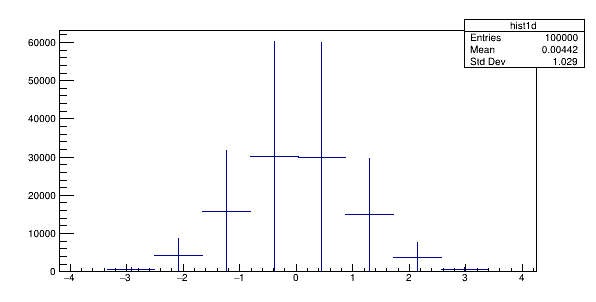

In [47]:
canvas = ROOT.TCanvas("canvas", "", 600, 330)
file = ROOT.TFile("tmp.root")
hist = file.Get("hist1d")
hist.Draw()
canvas.Draw()

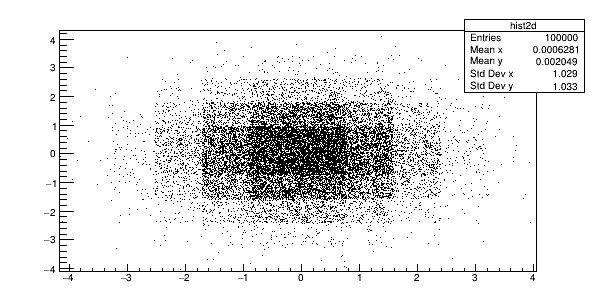

In [48]:
writable_file["hist2d"] = numpy.histogram2d(numpy.random.normal(0, 1, 100000),
                                            numpy.random.normal(0, 1, 100000))
file = ROOT.TFile("tmp.root")
hist = file.Get("hist2d")
hist.Draw()
canvas.Draw()

<br><br><br><br><br>

<center><b>Next up: advanced uproot!</b></center>

<br><br><br><br><br>